In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import torch
import os
import shutil

###### Upload Data

In [4]:
DATASET_PATH = "D:/Data/Fashion"
print(os.listdir(DATASET_PATH))

['5000', '5000.zip', 'fashion.torrent', 'images', 'images.csv', 'styles', 'styles.csv']


In [5]:
df = pd.read_csv(DATASET_PATH + "/styles.csv", error_bad_lines=False)
new_df = df.dropna()
new_df['image'] = new_df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
new_df = new_df.reset_index(drop=True)
new_df.head(10)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch,30039.jpg


In [6]:
new_df.to_csv('new_style.csv')

###### View image

In [7]:
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional
    
def img_path(img):
    return DATASET_PATH+"/images/"+img

def load_image(img, resized_fac = 0.1):
    img     = cv2.imread(img_path(img))
    w, h, _ = img.shape
    resized = cv2.resize(img, (int(h*resized_fac), int(w*resized_fac)), interpolation = cv2.INTER_AREA)
    return resized

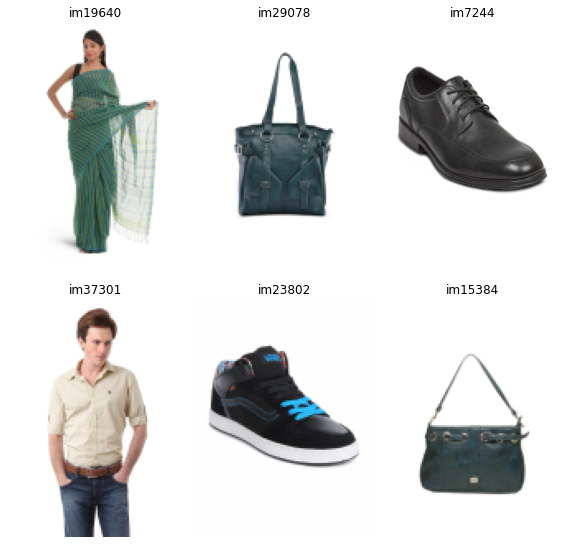

In [8]:
# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in new_df.sample(6).iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

###### view distribution

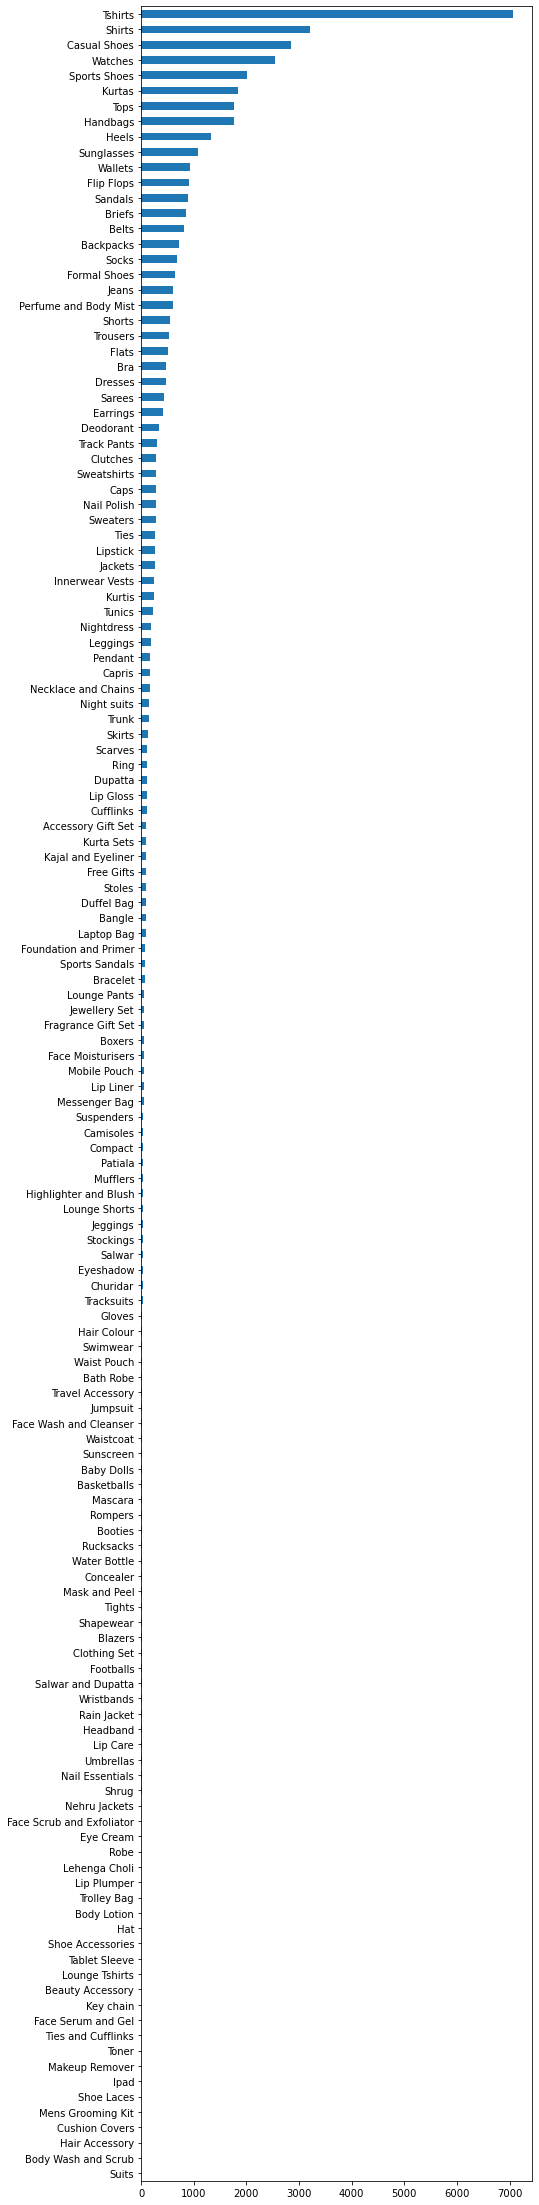

In [9]:
plt.figure(figsize=(7,40))
new_df.articleType.value_counts().sort_values().plot(kind='barh')

In [10]:
import seaborn as sns

In [11]:
p_value = new_df.articleType.value_counts().sort_values() / len(new_df)
p_value = p_value.to_dict()
p_value_array = [p_value[i] for i in new_df['articleType']]
new_df['p_value_articleType'] = p_value_array

In [12]:
new_df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,p_value_articleType
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,0.072918
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,0.013681
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,0.057672
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,0.006897
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,0.160310
...,...,...,...,...,...,...,...,...,...,...,...,...
44072,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg,0.064546
44073,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg,0.020736
44074,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,18842.jpg,0.160310
44075,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,46694.jpg,0.013681


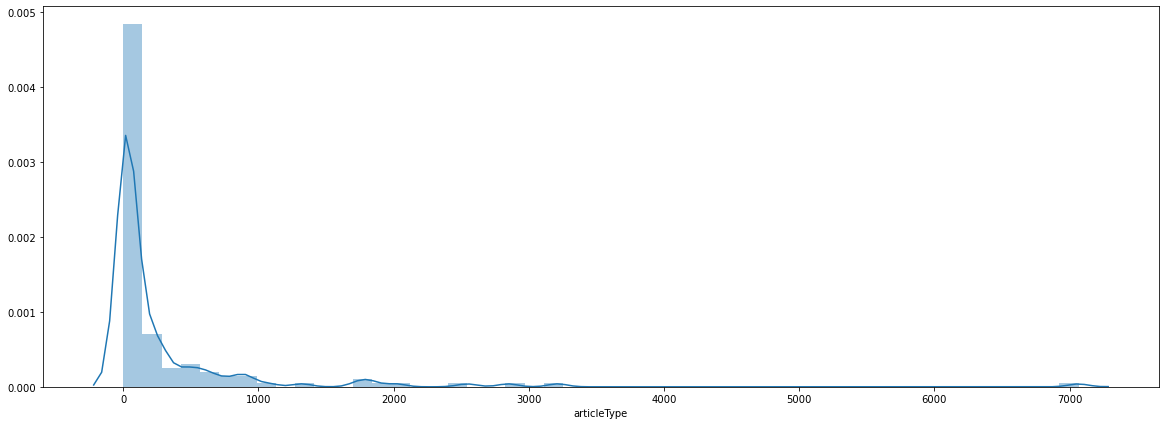

In [13]:
plt.figure(figsize=(20,7))
sns.distplot(new_df.articleType.value_counts().sort_values())

###### How we see it's look like Poisson distribution, then we choose random 5000 rows from our dataset to training.

###### Random select

In [14]:
s = np.random.choice(len(new_df), size=(len(new_df)), replace=False)
list(s)

[34287,
 22296,
 17009,
 40184,
 22994,
 9892,
 19398,
 43596,
 37311,
 33025,
 4255,
 40600,
 3455,
 33640,
 35117,
 32143,
 7259,
 10984,
 23082,
 8278,
 866,
 8017,
 6372,
 26366,
 6252,
 43755,
 28445,
 16806,
 30044,
 5619,
 22555,
 25627,
 20179,
 4098,
 11317,
 36965,
 14088,
 2699,
 1991,
 16068,
 32065,
 33075,
 20291,
 6635,
 8862,
 41744,
 7640,
 13289,
 13733,
 38276,
 12191,
 34932,
 6172,
 7167,
 38247,
 2220,
 42580,
 32737,
 23538,
 17341,
 16896,
 4707,
 8099,
 14303,
 25980,
 14829,
 3971,
 29117,
 19902,
 40340,
 37264,
 29346,
 26659,
 30623,
 6617,
 30786,
 37374,
 42172,
 17671,
 26592,
 11167,
 27336,
 2217,
 12011,
 43426,
 13334,
 14101,
 33986,
 7324,
 19161,
 23544,
 39392,
 786,
 38058,
 4424,
 16886,
 14317,
 253,
 7781,
 1240,
 38336,
 39556,
 16839,
 12912,
 41209,
 35244,
 13394,
 23201,
 11174,
 33741,
 18352,
 14812,
 8590,
 10895,
 40856,
 38935,
 19027,
 21558,
 36643,
 24275,
 10836,
 41846,
 3687,
 38143,
 25060,
 41690,
 5579,
 38700,
 18465,
 167

In [15]:
dataset = new_df.loc[s]
dataset

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,p_value_articleType
34287,38991,Boys,Apparel,Topwear,Tshirts,White,Summer,2012.0,Casual,Gini and Jony Boys Rodeo T-shirt,38991.jpg,0.160310
22296,38490,Boys,Apparel,Topwear,Tshirts,White,Summer,2012.0,Casual,Gini and Jony Boys Pack Of Two White T-shirt,38490.jpg,0.160310
17009,5823,Men,Apparel,Topwear,Tshirts,Red,Summer,2011.0,Casual,Puma Men's Heroes Graphic Red T-shirt,5823.jpg,0.160310
40184,33090,Women,Footwear,Shoes,Heels,Gold,Winter,2015.0,Casual,Catwalk Women Gold Flats,33090.jpg,0.030016
22994,17826,Women,Footwear,Shoes,Casual Shoes,White,Fall,2011.0,Casual,Nike Women Court Majestic White Casual Shoe,17826.jpg,0.064546
...,...,...,...,...,...,...,...,...,...,...,...,...
73,2288,Women,Apparel,Topwear,Tshirts,Black,Fall,2010.0,Sports,Nike Women Black T-shirt,2288.jpg,0.160310
25620,47306,Women,Accessories,Bags,Handbags,Purple,Summer,2012.0,Casual,Baggit Women Purple Handbag,47306.jpg,0.039907
17026,25592,Women,Apparel,Apparel Set,Kurta Sets,Black,Fall,2011.0,Ethnic,Vishudh Women Black & Purple Printed Churidar ...,25592.jpg,0.002133
17047,54737,Men,Footwear,Shoes,Casual Shoes,Navy Blue,Summer,2012.0,Casual,Vans Men Navy Blue Cobern Shoes,54737.jpg,0.064546


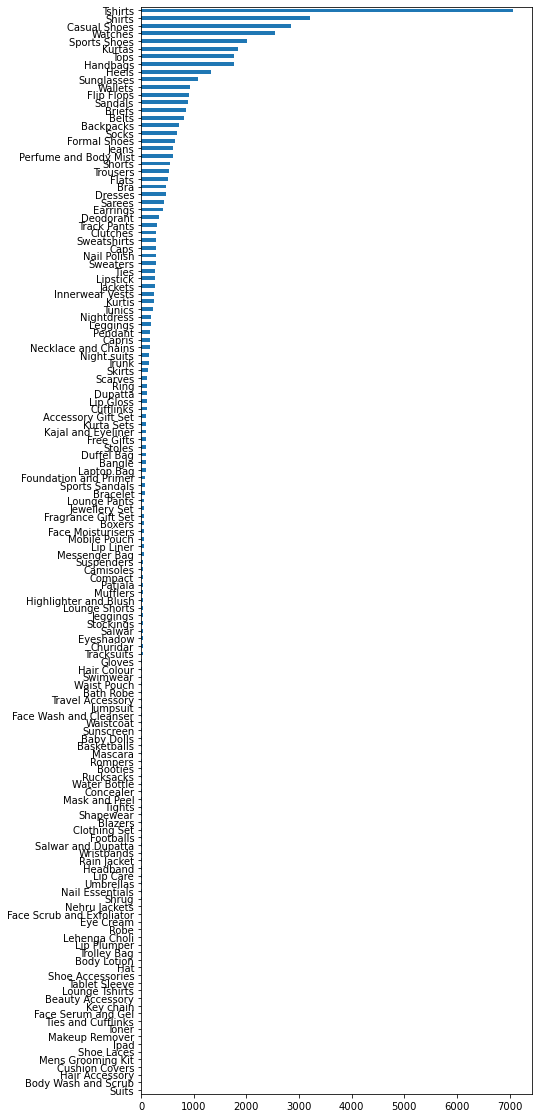

In [16]:
plt.figure(figsize=(7,20))
dataset.articleType.value_counts().sort_values().plot(kind='barh')

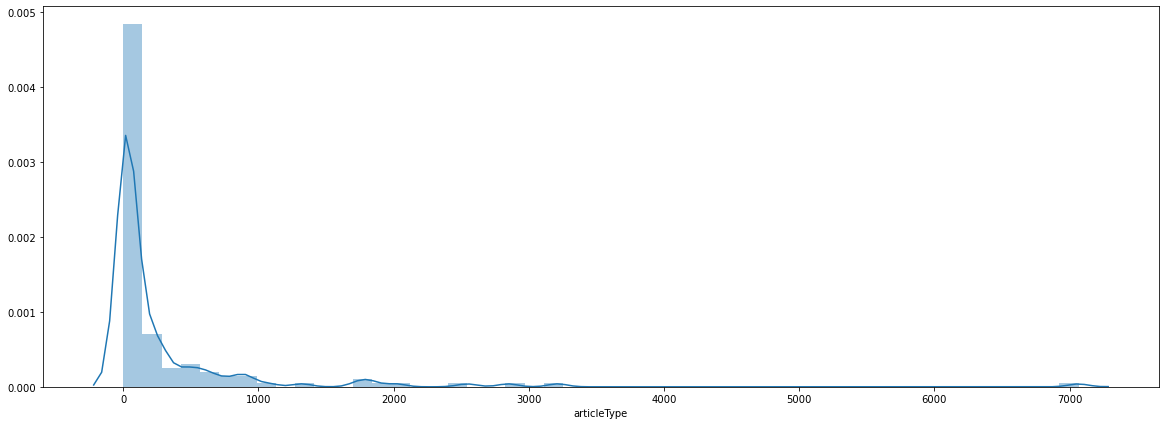

In [17]:
plt.figure(figsize=(20,7))
sns.distplot(dataset.articleType.value_counts().sort_values())

In [18]:
dataset.reset_index()

,index,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,p_value_articleType
0,34287,38991,Boys,Apparel,Topwear,Tshirts,White,Summer,2012.0,Casual,Gini and Jony Boys Rodeo T-shirt,38991.jpg,0.160310
1,22296,38490,Boys,Apparel,Topwear,Tshirts,White,Summer,2012.0,Casual,Gini and Jony Boys Pack Of Two White T-shirt,38490.jpg,0.160310
2,17009,5823,Men,Apparel,Topwear,Tshirts,Red,Summer,2011.0,Casual,Puma Men's Heroes Graphic Red T-shirt,5823.jpg,0.160310
3,40184,33090,Women,Footwear,Shoes,Heels,Gold,Winter,2015.0,Casual,Catwalk Women Gold Flats,33090.jpg,0.030016
4,22994,17826,Women,Footwear,Shoes,Casual Shoes,White,Fall,2011.0,Casual,Nike Women Court Majestic White Casual Shoe,17826.jpg,0.064546
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44072,73,2288,Women,Apparel,Topwear,Tshirts,Black,Fall,2010.0,Sports,Nike Women Black T-shirt,2288.jpg,0.160310
44073,25620,47306,Women,Accessories,Bags,Handbags,Purple,Summer,2012.0,Casual,Baggit Women Purple Handbag,47306.jpg,0.039907
44074,17026,25592,Women,Apparel,Apparel Set,Kurta Sets,Black,Fall,2011.0,Ethnic,Vishudh Women Black & Purple Printed Churidar ...,25592.jpg,0.002133
44075,17047,54737,Men,Footwear,Shoes,Casual Shoes,Navy Blue,Summer,2012.0,Casual,Vans Men Navy Blue Cobern Shoes,54737.jpg,0.064546


In [19]:
list_name = dataset.articleType.value_counts().index
article_type_dict = {}
for i in range(len(list_name)):
    article_type_dict[list_name[i]] = i

In [20]:
article_type_dict

{'Tshirts': 0,
 'Shirts': 1,
 'Casual Shoes': 2,
 'Watches': 3,
 'Sports Shoes': 4,
 'Kurtas': 5,
 'Tops': 6,
 'Handbags': 7,
 'Heels': 8,
 'Sunglasses': 9,
 'Wallets': 10,
 'Flip Flops': 11,
 'Sandals': 12,
 'Briefs': 13,
 'Belts': 14,
 'Backpacks': 15,
 'Socks': 16,
 'Formal Shoes': 17,
 'Jeans': 18,
 'Perfume and Body Mist': 19,
 'Shorts': 20,
 'Trousers': 21,
 'Flats': 22,
 'Bra': 23,
 'Dresses': 24,
 'Sarees': 25,
 'Earrings': 26,
 'Deodorant': 27,
 'Track Pants': 28,
 'Clutches': 29,
 'Sweatshirts': 30,
 'Caps': 31,
 'Nail Polish': 32,
 'Sweaters': 33,
 'Ties': 34,
 'Lipstick': 35,
 'Jackets': 36,
 'Innerwear Vests': 37,
 'Kurtis': 38,
 'Tunics': 39,
 'Nightdress': 40,
 'Leggings': 41,
 'Pendant': 42,
 'Capris': 43,
 'Necklace and Chains': 44,
 'Night suits': 45,
 'Trunk': 46,
 'Skirts': 47,
 'Scarves': 48,
 'Ring': 49,
 'Dupatta': 50,
 'Lip Gloss': 51,
 'Cufflinks': 52,
 'Accessory Gift Set': 53,
 'Kurta Sets': 54,
 'Kajal and Eyeliner': 55,
 'Free Gifts': 56,
 'Stoles': 57,
 'D

In [21]:
article_type_code = [article_type_dict[i] for i in dataset['articleType']]
dataset['code'] = article_type_code

###### Cut dataset to intersting

In [22]:
interesting = dataset[['articleType', 'code', 'image']]
interesting

,articleType,code,image
34287,Tshirts,0,38991.jpg
22296,Tshirts,0,38490.jpg
17009,Tshirts,0,5823.jpg
40184,Heels,8,33090.jpg
22994,Casual Shoes,2,17826.jpg
...,...,...,...
73,Tshirts,0,2288.jpg
25620,Handbags,7,47306.jpg
17026,Kurta Sets,54,25592.jpg
17047,Casual Shoes,2,54737.jpg


###### Put image in one file to upload it to pytorch

In [23]:
import shutil

In [24]:
not_found = []
def copy_image_to(src, dst):
    try:
        shutil.copy(src,dst)
    except IOError as e:
        print(e)
        error = src.split('/')[4]
        not_found.append(error)

In [25]:
len(np.unique(np.array(interesting['image'])))

44077

In [24]:
for i in interesting['image']:
    copy_image_to(DATASET_PATH+'/images/' + i, DATASET_PATH+'/5000/')

[Errno 2] No such file or directory: 'D:/Data/Fashion/images/11225.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/11286.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/10796.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/11282.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/10738.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/11017.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/10371.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/10723.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/10314.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/10606.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/10574.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/10579.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/11113.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/111

[Errno 2] No such file or directory: 'D:/Data/Fashion/images/10366.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/11361.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/11237.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/11053.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/11428.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/10605.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/11303.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/11086.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/10307.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/10728.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/10319.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/11289.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/11056.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/108

[Errno 2] No such file or directory: 'D:/Data/Fashion/images/11064.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/11045.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/10369.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/11298.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/39401.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/11440.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/10334.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/10741.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/10992.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/10759.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/10884.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/10597.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/10672.jpg'
[Errno 2] No such file or directory: 'D:/Data/Fashion/images/108

In [25]:
interesting = interesting[~interesting.image.isin(not_found)]
interesting

,articleType,code,image
21252,Deodorant,27,58958.jpg
14314,Tops,6,37185.jpg
27981,Track Pants,28,28519.jpg
19681,Sarees,25,57972.jpg
13284,Sports Shoes,4,25423.jpg
...,...,...,...
12334,Tshirts,0,4214.jpg
33081,Kurtas,5,32203.jpg
32802,Watches,3,25639.jpg
9101,Briefs,13,56303.jpg


In [26]:
from torch.utils.data import DataLoader, Dataset

In [27]:
def convert_image_to_gray_and_resize(img_path):
    # convert to gray
    src = cv2.imread(img_path, 0)
    
    # dsize
    dsize = (28, 28)

    # resize image
    output = cv2.resize(src, dsize)
    
    return output

In [28]:
img_list = os.listdir(DATASET_PATH + '/5000')

In [29]:
my_data = []

In [30]:
for i in img_list:
    path  = DATASET_PATH + '/5000/' + i
    data  = convert_image_to_gray_and_resize(path)
    label = int(interesting[interesting['image'] == i]['code'])
    my_data.append([data, label])

In [68]:
my_data = np.array(my_data)

In [29]:
my_data = np.load('my_data.npy', allow_pickle=True)

###### Save file

In [30]:
# np.save('my_data.npy', my_data)

In [31]:
interesting.to_csv('interesting')

In [32]:
X = my_data[:, 0]
y = my_data[:, 1]

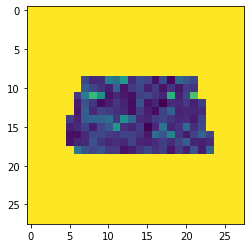

In [33]:
plt.imshow(X[2])

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
device = torch.device('cpu' if torch.cuda.is_available() else 'cpu') #'cudo:0'

In [37]:
X_train = torch.FloatTensor([X_train])
y_train = torch.FloatTensor([y_train])
X_test  = torch.FloatTensor([X_test])
y_test  = torch.FloatTensor([y_test])

In [38]:
X_train = X_train.view(X_train.size(1) , 1, 28, 28)
X_test  = X_test.view(X_test.size(1), 1, 28, 28)

In [39]:
y_train = y_train.type(torch.LongTensor)
y_test  = y_test.type(torch.LongTensor)

In [40]:
y_train = y_train.view(-1)
y_test  = y_test.view(-1)

In [41]:
print(X_train.dtype, y_train.dtype)

torch.float32 torch.int64


In [42]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1   = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=0) # сделает 10,10
        self.act2  = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.Tanh()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Tanh()
        
        self.fc3   = torch.nn.Linear(84, 142)
        
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
        
        x = self.fc1(x)
        x = self.act3(x)
        
        x = self.fc2(x)
        x = self.act4(x)
        
        x = self.fc3(x)
        
        return x

In [43]:
model = LeNet5()

In [44]:
print(model)

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (act1): Tanh()
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (act2): Tanh()
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (act3): Tanh()
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (act4): Tanh()
  (fc3): Linear(in_features=84, out_features=142, bias=True)
)


In [45]:
model  = model.to(device)

In [46]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [47]:
batch_size = 150

In [48]:
test_accurucy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(100):
    print("epoch:", epoch)
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = model.forward(X_batch)
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
        test_preds = model.forward(X_test)
        test_loss_history.append(loss(test_preds, y_test).data.cpu())
        
        accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
        test_accurucy_history.append(accuracy)
        
        print("accuracy:", accuracy, "loss", loss_value)

epoch: 0
accuracy: tensor(0.1593) loss tensor(4.9761, grad_fn=<NllLossBackward>)
accuracy: tensor(0.1594) loss tensor(4.8888, grad_fn=<NllLossBackward>)
accuracy: tensor(0.1594) loss tensor(4.7894, grad_fn=<NllLossBackward>)
accuracy: tensor(0.1594) loss tensor(4.6552, grad_fn=<NllLossBackward>)
accuracy: tensor(0.1594) loss tensor(4.5759, grad_fn=<NllLossBackward>)
accuracy: tensor(0.1594) loss tensor(4.4866, grad_fn=<NllLossBackward>)
accuracy: tensor(0.1594) loss tensor(4.4260, grad_fn=<NllLossBackward>)
accuracy: tensor(0.1594) loss tensor(4.2471, grad_fn=<NllLossBackward>)
accuracy: tensor(0.1594) loss tensor(4.1949, grad_fn=<NllLossBackward>)
accuracy: tensor(0.1594) loss tensor(3.9491, grad_fn=<NllLossBackward>)
accuracy: tensor(0.1594) loss tensor(4.0213, grad_fn=<NllLossBackward>)
accuracy: tensor(0.1594) loss tensor(3.9315, grad_fn=<NllLossBackward>)
accuracy: tensor(0.1594) loss tensor(4.0398, grad_fn=<NllLossBackward>)
accuracy: tensor(0.1594) loss tensor(3.9169, grad_fn=<N

accuracy: tensor(0.2210) loss tensor(3.1422, grad_fn=<NllLossBackward>)
accuracy: tensor(0.2210) loss tensor(3.0768, grad_fn=<NllLossBackward>)
accuracy: tensor(0.2207) loss tensor(3.1615, grad_fn=<NllLossBackward>)
accuracy: tensor(0.2192) loss tensor(3.2450, grad_fn=<NllLossBackward>)
accuracy: tensor(0.2176) loss tensor(3.2491, grad_fn=<NllLossBackward>)
accuracy: tensor(0.2221) loss tensor(3.1517, grad_fn=<NllLossBackward>)
accuracy: tensor(0.2160) loss tensor(3.1491, grad_fn=<NllLossBackward>)
accuracy: tensor(0.2160) loss tensor(3.1020, grad_fn=<NllLossBackward>)
accuracy: tensor(0.2173) loss tensor(3.0671, grad_fn=<NllLossBackward>)
accuracy: tensor(0.2219) loss tensor(3.2011, grad_fn=<NllLossBackward>)
accuracy: tensor(0.2240) loss tensor(3.1549, grad_fn=<NllLossBackward>)
accuracy: tensor(0.2257) loss tensor(3.1011, grad_fn=<NllLossBackward>)
accuracy: tensor(0.2245) loss tensor(3.1643, grad_fn=<NllLossBackward>)
accuracy: tensor(0.2259) loss tensor(3.0719, grad_fn=<NllLossBac

accuracy: tensor(0.4187) loss tensor(2.2415, grad_fn=<NllLossBackward>)
accuracy: tensor(0.4243) loss tensor(1.9940, grad_fn=<NllLossBackward>)
accuracy: tensor(0.4288) loss tensor(2.0750, grad_fn=<NllLossBackward>)
accuracy: tensor(0.4326) loss tensor(2.1797, grad_fn=<NllLossBackward>)
accuracy: tensor(0.4234) loss tensor(2.3319, grad_fn=<NllLossBackward>)
accuracy: tensor(0.4259) loss tensor(1.8661, grad_fn=<NllLossBackward>)
epoch: 1
accuracy: tensor(0.4264) loss tensor(2.2445, grad_fn=<NllLossBackward>)
accuracy: tensor(0.4302) loss tensor(2.2115, grad_fn=<NllLossBackward>)
accuracy: tensor(0.4335) loss tensor(2.0950, grad_fn=<NllLossBackward>)
accuracy: tensor(0.4401) loss tensor(2.1098, grad_fn=<NllLossBackward>)
accuracy: tensor(0.4389) loss tensor(1.8164, grad_fn=<NllLossBackward>)
accuracy: tensor(0.4422) loss tensor(2.1451, grad_fn=<NllLossBackward>)
accuracy: tensor(0.4435) loss tensor(2.2616, grad_fn=<NllLossBackward>)
accuracy: tensor(0.4443) loss tensor(2.0602, grad_fn=<N

accuracy: tensor(0.5431) loss tensor(1.8025, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5431) loss tensor(1.5906, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5446) loss tensor(1.6438, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5440) loss tensor(1.9920, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5422) loss tensor(1.5765, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5417) loss tensor(1.3734, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5496) loss tensor(1.7595, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5547) loss tensor(1.6212, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5554) loss tensor(1.7845, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5514) loss tensor(1.8065, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5513) loss tensor(1.6522, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5533) loss tensor(1.7507, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5529) loss tensor(1.5878, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5574) loss tensor(1.8581, grad_fn=<NllLossBac

accuracy: tensor(0.6073) loss tensor(1.3034, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6029) loss tensor(1.4982, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5987) loss tensor(1.3718, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6131) loss tensor(1.6548, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6161) loss tensor(1.2587, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6114) loss tensor(1.5932, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6083) loss tensor(1.5849, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6045) loss tensor(1.4835, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5929) loss tensor(1.4687, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6007) loss tensor(1.1202, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5998) loss tensor(1.5919, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5971) loss tensor(1.6546, grad_fn=<NllLossBackward>)
epoch: 2
accuracy: tensor(0.5926) loss tensor(1.4611, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5858) loss tensor(1.3399, grad_fn=<N

accuracy: tensor(0.5599) loss tensor(1.4884, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5607) loss tensor(1.4558, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5695) loss tensor(1.6054, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5670) loss tensor(1.6901, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5661) loss tensor(1.3606, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5682) loss tensor(1.4866, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5750) loss tensor(1.6920, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5750) loss tensor(1.4020, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5697) loss tensor(1.2060, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5734) loss tensor(1.5855, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5832) loss tensor(1.4722, grad_fn=<NllLossBackward>)
accuracy: tensor(0.5903) loss tensor(1.1829, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6005) loss tensor(1.5876, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6086) loss tensor(1.1865, grad_fn=<NllLossBac

accuracy: tensor(0.6267) loss tensor(1.3148, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6270) loss tensor(1.4026, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6327) loss tensor(1.2408, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6379) loss tensor(1.4412, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6410) loss tensor(1.2989, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6427) loss tensor(1.2812, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6408) loss tensor(1.2366, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6397) loss tensor(1.2698, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6378) loss tensor(0.9781, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6458) loss tensor(1.1023, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6490) loss tensor(1.2296, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6466) loss tensor(1.0810, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6455) loss tensor(1.1071, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6411) loss tensor(1.3640, grad_fn=<NllLossBac

accuracy: tensor(0.6554) loss tensor(1.2812, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6569) loss tensor(0.9986, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6581) loss tensor(1.1165, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6601) loss tensor(1.1952, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6571) loss tensor(1.1061, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6561) loss tensor(1.0991, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6566) loss tensor(1.0028, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6562) loss tensor(1.1871, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6545) loss tensor(1.3576, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6569) loss tensor(1.2523, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6581) loss tensor(1.1398, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6573) loss tensor(1.0630, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6577) loss tensor(1.0367, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6601) loss tensor(1.2535, grad_fn=<NllLossBac

accuracy: tensor(0.6816) loss tensor(1.0051, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6811) loss tensor(1.2898, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6822) loss tensor(0.9693, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6843) loss tensor(1.0459, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6858) loss tensor(0.9274, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6832) loss tensor(1.0533, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6835) loss tensor(0.9650, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6807) loss tensor(1.1660, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6805) loss tensor(0.8633, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6814) loss tensor(0.9381, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6821) loss tensor(1.1268, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6821) loss tensor(1.1412, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6831) loss tensor(0.9778, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6848) loss tensor(1.0271, grad_fn=<NllLossBac

accuracy: tensor(0.6952) loss tensor(1.0222, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6950) loss tensor(0.9059, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6929) loss tensor(1.0023, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6903) loss tensor(1.0883, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6913) loss tensor(1.0209, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6931) loss tensor(0.9643, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6917) loss tensor(1.0224, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6915) loss tensor(0.8857, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6928) loss tensor(0.9014, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6942) loss tensor(0.8681, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6949) loss tensor(0.9388, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6970) loss tensor(1.0789, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6960) loss tensor(1.0596, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6965) loss tensor(0.9991, grad_fn=<NllLossBac

accuracy: tensor(0.6890) loss tensor(0.9888, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6930) loss tensor(1.0127, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6950) loss tensor(1.1830, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6965) loss tensor(1.1303, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6959) loss tensor(1.0729, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6954) loss tensor(0.8486, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6928) loss tensor(0.8630, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6927) loss tensor(1.0982, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6923) loss tensor(0.9013, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6914) loss tensor(0.9491, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6835) loss tensor(1.0101, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6914) loss tensor(1.2049, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6938) loss tensor(1.0711, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6858) loss tensor(1.1617, grad_fn=<NllLossBac

accuracy: tensor(0.7035) loss tensor(0.9250, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7045) loss tensor(1.2013, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7064) loss tensor(1.1264, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7070) loss tensor(0.8266, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7045) loss tensor(0.9658, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7016) loss tensor(0.8558, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7018) loss tensor(0.7406, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7023) loss tensor(0.9891, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6998) loss tensor(1.0491, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6994) loss tensor(0.9781, grad_fn=<NllLossBackward>)
accuracy: tensor(0.6992) loss tensor(0.9865, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7003) loss tensor(0.8729, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7041) loss tensor(0.9746, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7067) loss tensor(0.8567, grad_fn=<NllLossBac

accuracy: tensor(0.7128) loss tensor(0.9683, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7135) loss tensor(0.9127, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7119) loss tensor(1.0375, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7133) loss tensor(0.9194, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7157) loss tensor(0.7334, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7169) loss tensor(0.8545, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7161) loss tensor(0.8680, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7150) loss tensor(0.9885, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7142) loss tensor(0.9936, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7133) loss tensor(0.9368, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7133) loss tensor(0.8574, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7135) loss tensor(0.9388, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7166) loss tensor(0.9797, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7163) loss tensor(0.9454, grad_fn=<NllLossBac

accuracy: tensor(0.7144) loss tensor(0.9133, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7162) loss tensor(0.6953, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7176) loss tensor(0.8529, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7161) loss tensor(0.7768, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7160) loss tensor(0.8552, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7155) loss tensor(0.9475, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7155) loss tensor(0.7356, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7151) loss tensor(0.9156, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7141) loss tensor(0.7974, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7151) loss tensor(0.8055, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7129) loss tensor(0.7875, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7088) loss tensor(1.0595, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7079) loss tensor(1.0322, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7103) loss tensor(0.8272, grad_fn=<NllLossBac

accuracy: tensor(0.7226) loss tensor(0.7830, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7216) loss tensor(0.8982, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7205) loss tensor(1.0037, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7216) loss tensor(0.8696, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7229) loss tensor(0.9527, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7258) loss tensor(0.9575, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7273) loss tensor(0.9129, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7281) loss tensor(0.9718, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7245) loss tensor(0.7975, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7238) loss tensor(0.7951, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7200) loss tensor(0.8861, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7199) loss tensor(0.8084, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7213) loss tensor(0.8675, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7232) loss tensor(0.7430, grad_fn=<NllLossBac

accuracy: tensor(0.7136) loss tensor(0.8926, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7144) loss tensor(0.8612, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7120) loss tensor(0.9122, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7153) loss tensor(0.8397, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7137) loss tensor(1.1560, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7122) loss tensor(0.8466, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7088) loss tensor(0.9714, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7095) loss tensor(0.8987, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7097) loss tensor(0.7360, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7158) loss tensor(0.8382, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7199) loss tensor(0.7392, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7229) loss tensor(0.8196, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7232) loss tensor(0.8600, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7209) loss tensor(0.8001, grad_fn=<NllLossBac

accuracy: tensor(0.7227) loss tensor(0.8093, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7227) loss tensor(0.7654, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7251) loss tensor(1.0015, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7285) loss tensor(0.6523, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7318) loss tensor(0.7264, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7323) loss tensor(0.7841, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7298) loss tensor(0.7047, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7265) loss tensor(0.8210, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7270) loss tensor(1.0029, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7271) loss tensor(0.7506, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7279) loss tensor(0.8137, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7319) loss tensor(0.8942, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7342) loss tensor(0.7770, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7354) loss tensor(0.6793, grad_fn=<NllLossBac

accuracy: tensor(0.7225) loss tensor(0.8448, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7205) loss tensor(0.7432, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7186) loss tensor(0.9094, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7185) loss tensor(0.6710, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7190) loss tensor(0.7939, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7214) loss tensor(0.8788, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7231) loss tensor(0.8383, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7231) loss tensor(1.0229, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7200) loss tensor(0.9688, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7197) loss tensor(0.9441, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7218) loss tensor(0.9238, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7233) loss tensor(0.8987, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7193) loss tensor(0.8624, grad_fn=<NllLossBackward>)
accuracy: tensor(0.7201) loss tensor(0.8438, grad_fn=<NllLossBac

KeyboardInterrupt: 

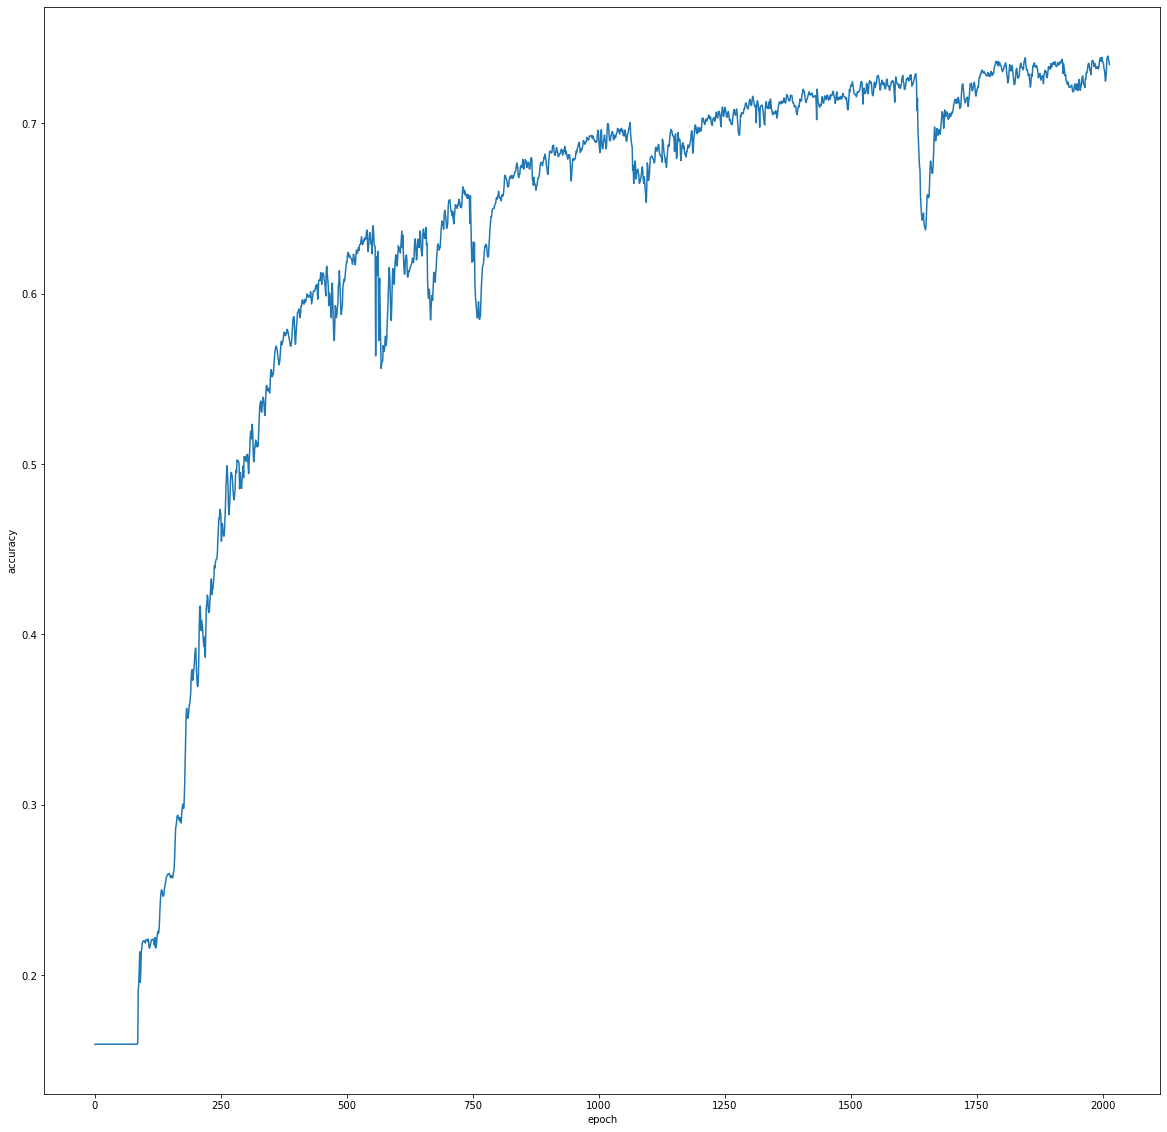

In [53]:
plt.figure(figsize=(20, 20))
plt.plot(test_accurucy_history)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

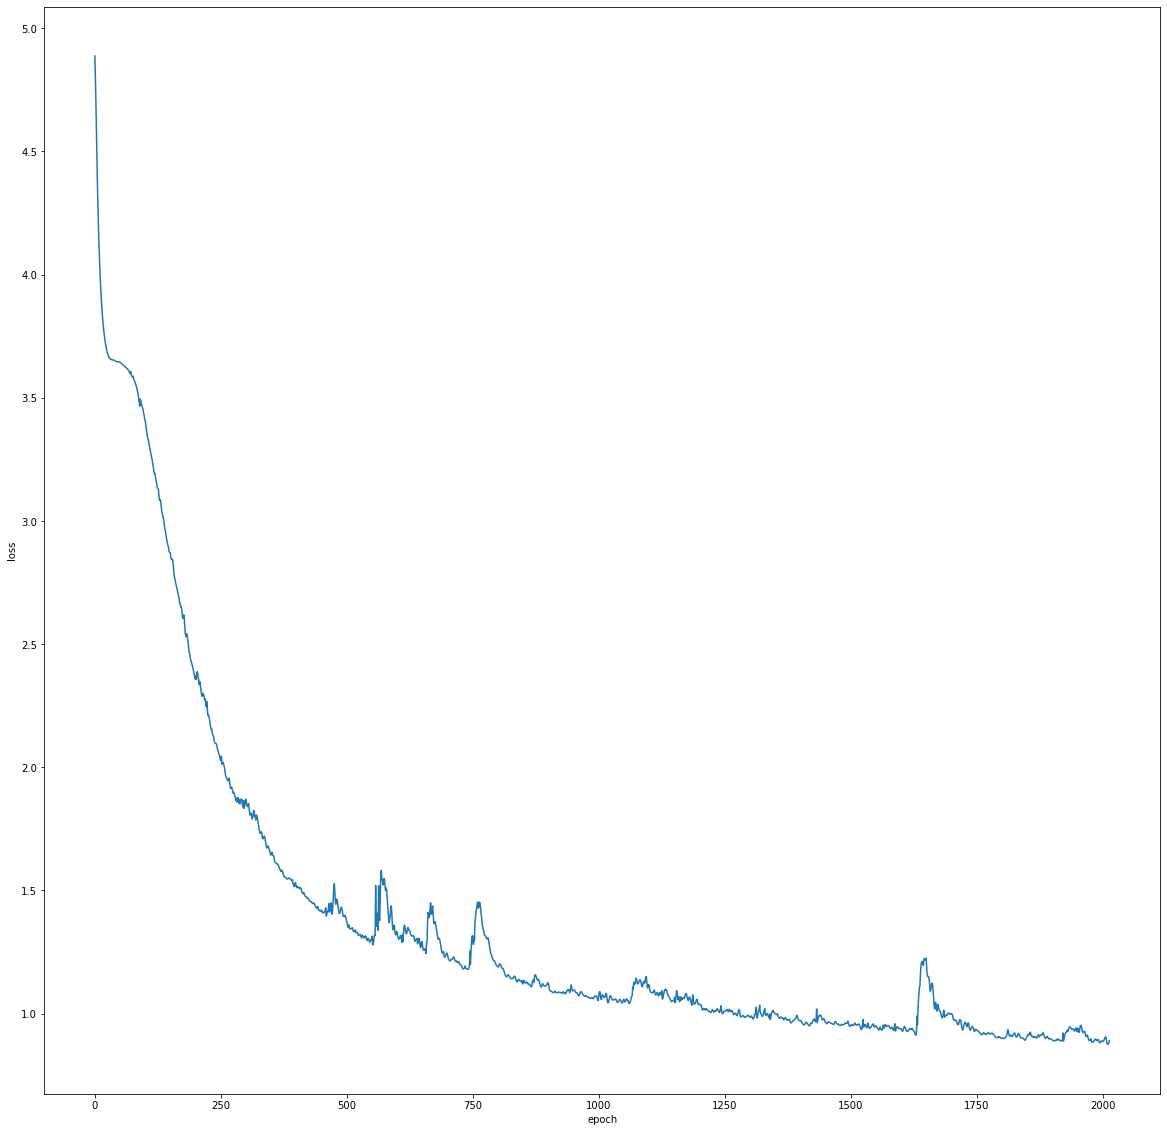

In [54]:
plt.figure(figsize=(20, 20))
plt.plot(test_loss_history)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

#### Example

###### Convert number to dict

In [120]:
article_type_dict_T = {}
for key, value in article_type_dict.items():
    article_type_dict_T[value] = key

In [122]:
article_type_dict_T[11]

'Flip Flops'

In [123]:
article_type_dict['Flip Flops']

11

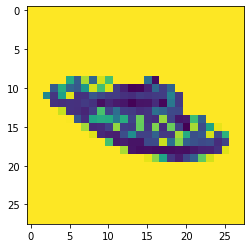

Flip Flops The number is 11


In [139]:
plt.imshow(X_test[1][0])
plt.show()
print(article_type_dict_T[int(y_test[1].numpy())], "The number is",y_test[1].numpy())

In [149]:
test = X_test[1]
test = test.unsqueeze_(0)
test.shape

torch.Size([1, 1, 28, 28])

In [152]:
preds = model.forward(test)
preds.argmax(dim=1)

tensor([11])

How we see we get same example

#### Now we save the model 

In [160]:
PATH = "./LeNet5.pth"

In [161]:
torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, PATH)

In [164]:
model2 = LeNet5()

In [166]:
loss2 = torch.nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model.parameters(), lr=0.001)

In [167]:
checkpoint2 = torch.load(PATH)
model2.load_state_dict(checkpoint2['model_state_dict'])
optimizer2.load_state_dict(checkpoint2['optimizer_state_dict'])
epoch2 = checkpoint2['epoch']
loss2 = checkpoint2['loss']

In [169]:
model2.forward(test).argmax(dim=1)

tensor([11])

In [ ]:
counter = 0
for i in range(len(df)):
    if 